In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_predict, cross_val_score

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold

from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import random

In [2]:
scData = pd.read_csv('train.csv')
scUnique = pd.read_csv('unique_m.csv')
scUnique = scUnique.drop(['critical_temp', 'material'], axis = 1)


scData
# unique

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.00
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.00
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.00
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,22.00
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809,23.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21258,4,106.957877,53.095769,82.515384,43.135565,1.177145,1.254119,146.88130,15.504479,65.764081,...,3.555556,3.223710,3.519911,1.377820,0.913658,1,2.168889,0.433013,0.496904,2.44
21259,5,92.266740,49.021367,64.812662,32.867748,1.323287,1.571630,188.38390,7.353333,69.232655,...,2.047619,2.168944,2.038991,1.594167,1.337246,1,0.904762,0.400000,0.212959,122.10
21260,2,99.663190,95.609104,99.433882,95.464320,0.690847,0.530198,13.51362,53.041104,6.756810,...,4.800000,4.472136,4.781762,0.686962,0.450561,1,3.200000,0.500000,0.400000,1.98
21261,2,99.663190,97.095602,99.433882,96.901083,0.690847,0.640883,13.51362,31.115202,6.756810,...,4.690000,4.472136,4.665819,0.686962,0.577601,1,2.210000,0.500000,0.462493,1.84


In [3]:
critTempDF = pd.concat([scData, scUnique], axis = 1)
critTempDF

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,Ir,Pt,Au,Hg,Tl,Pb,Bi,Po,At,Rn
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21258,4,106.957877,53.095769,82.515384,43.135565,1.177145,1.254119,146.88130,15.504479,65.764081,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
21259,5,92.266740,49.021367,64.812662,32.867748,1.323287,1.571630,188.38390,7.353333,69.232655,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,0
21260,2,99.663190,95.609104,99.433882,95.464320,0.690847,0.530198,13.51362,53.041104,6.756810,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
21261,2,99.663190,97.095602,99.433882,96.901083,0.690847,0.640883,13.51362,31.115202,6.756810,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0


In [5]:
x = critTempDF.drop('critical_temp', axis = 1)
y = critTempDF['critical_temp']
print(x.shape)
print(y.shape)

(21263, 167)
(21263,)


In [6]:
x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size = 0.2,
                                                    random_state = 42)

In [8]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

## EDA

In [19]:
print(critTempDF.isnull().sum())
print('\n')

critTempDF.describe()


number_of_elements       0
mean_atomic_mass         0
wtd_mean_atomic_mass     0
gmean_atomic_mass        0
wtd_gmean_atomic_mass    0
                        ..
Pb                       0
Bi                       0
Po                       0
At                       0
Rn                       0
Length: 168, dtype: int64




,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,Ir,Pt,Au,Hg,Tl,Pb,Bi,Po,At,Rn
count,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,...,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.0,21263.0,21263.0
mean,4.115224,87.557631,72.988310,71.290627,58.539916,1.165608,1.063884,115.601251,33.225218,44.391893,...,0.061558,0.034108,0.020535,0.036663,0.047954,0.042461,0.201009,0.0,0.0,0.0
std,1.439295,29.676497,33.490406,31.030272,36.651067,0.364930,0.401423,54.626887,26.967752,20.035430,...,0.864859,0.307888,0.717975,0.205846,0.272298,0.274365,0.655927,0.0,0.0,0.0
min,1.000000,6.941000,6.423452,5.320573,1.960849,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
25%,3.000000,72.458076,52.143839,58.041225,35.248990,0.966676,0.775363,78.512902,16.824174,32.890369,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
50%,4.000000,84.922750,60.696571,66.361592,39.918385,1.199541,1.146783,122.906070,26.636008,45.123500,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
75%,5.000000,100.404410,86.103540,78.116681,73.113234,1.444537,1.359418,154.119320,38.356908,59.322812,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
max,9.000000,208.980400,208.980400,208.980400,208.980400,1.983797,1.958203,207.972460,205.589910,101.019700,...,45.000000,5.800000,64.000000,8.000000,7.000000,19.000000,14.000000,0.0,0.0,0.0


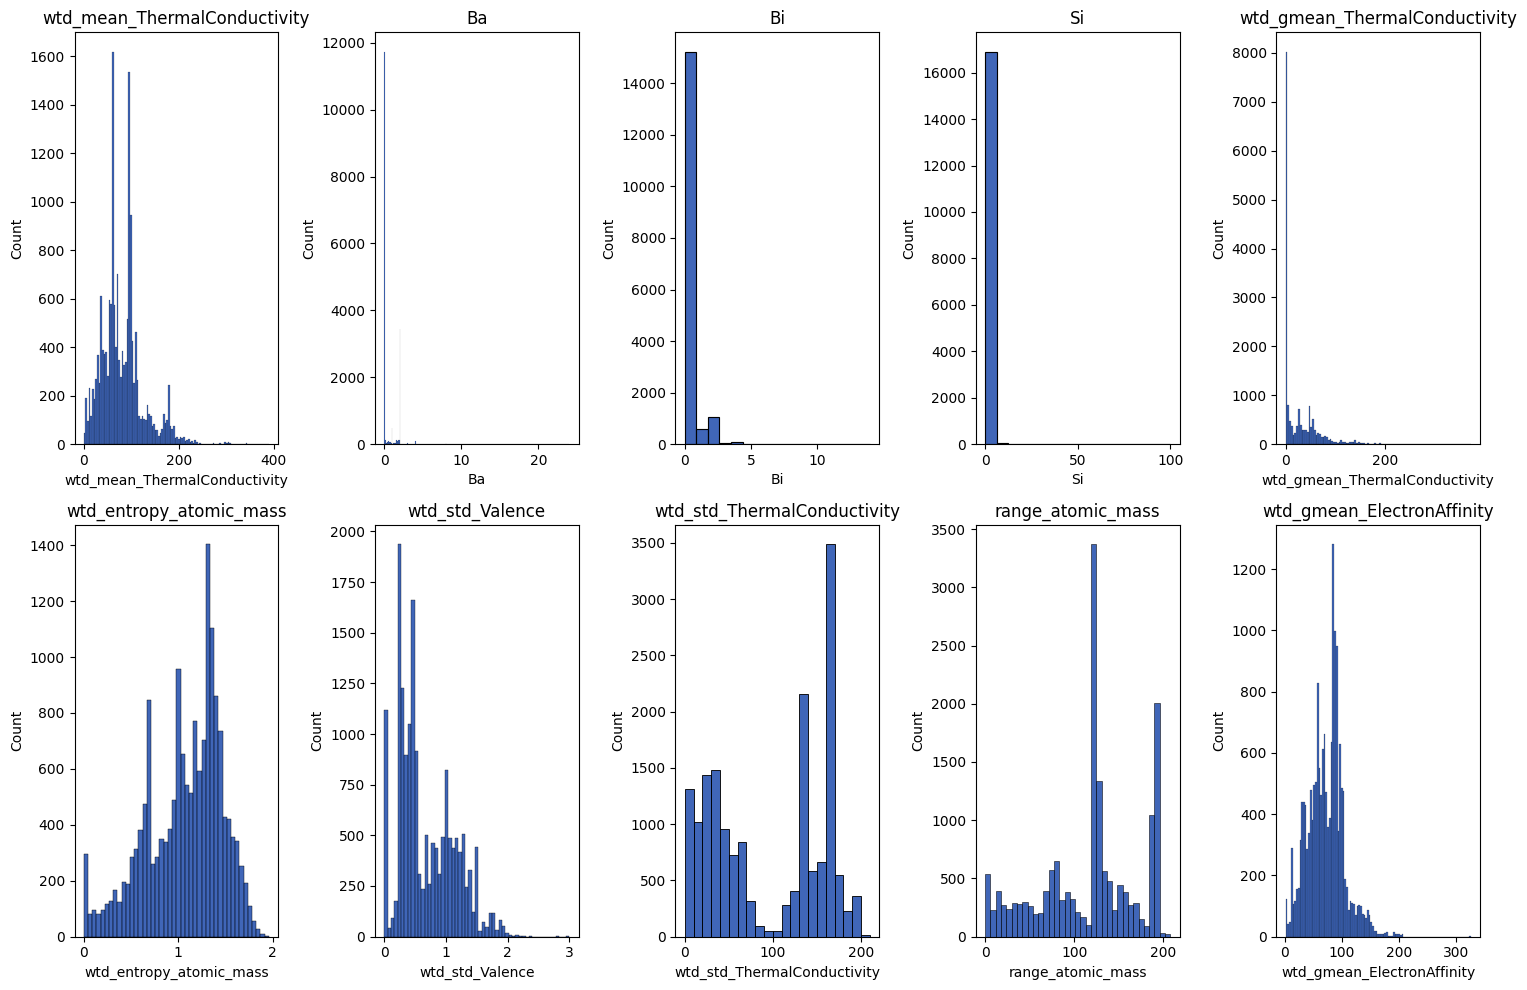

In [37]:
# picked the feature important ones based on lasso from below...
# should we switch this to the randomied features like in the other plots

selected_columns = [
    'wtd_mean_ThermalConductivity', 'Ba', 'Bi', 'Si',
    'wtd_gmean_ThermalConductivity', 'wtd_entropy_atomic_mass',
    'wtd_std_Valence', 'wtd_std_ThermalConductivity',
    'range_atomic_mass', 'wtd_gmean_ElectronAffinity'
]

plt.figure(figsize = (15, 10))
num_cols = len(selected_columns)
for idx, col in enumerate(selected_columns):
    plt.subplot(2, (num_cols + 1) // 2, idx + 1)
    sns.histplot(x_train[col], color = '#0033A0')
    plt.title(col)
plt.tight_layout()
plt.show()


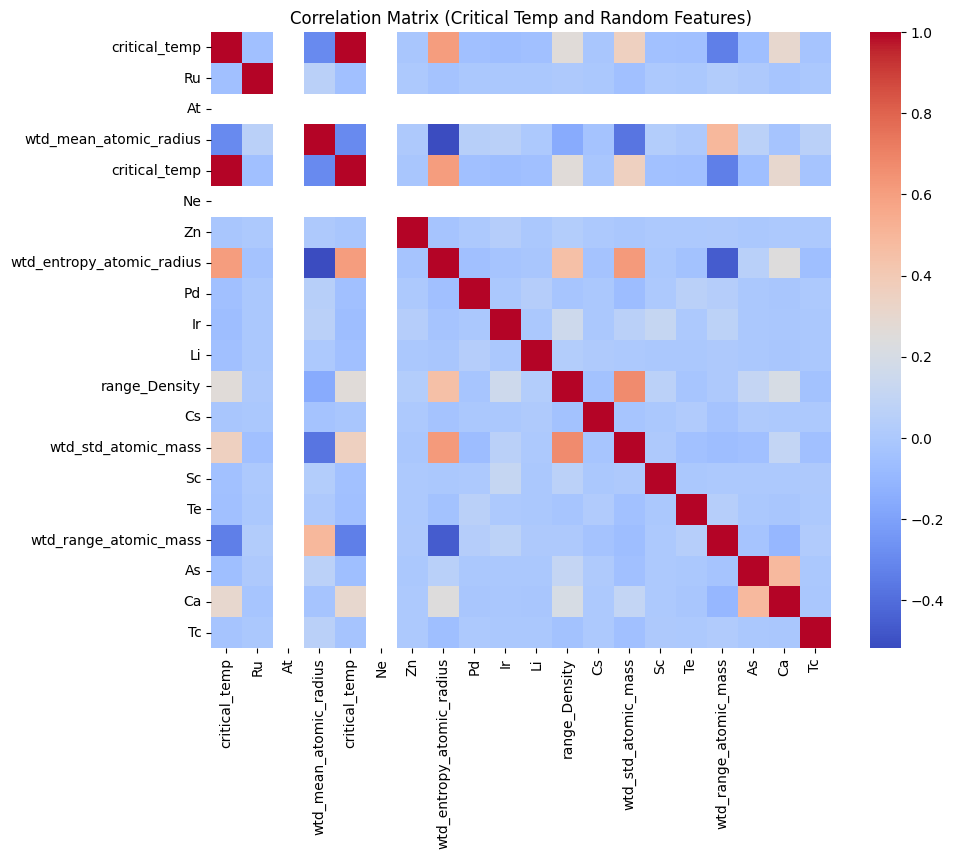

In [59]:
random_features = random.sample(list(critTempDF.columns), 19)

selected_features = ['critical_temp'] + random_features

selected_df = critTempDF[selected_features]

plt.figure(figsize = (10, 8))
sns.heatmap(selected_df.corr(), cmap = 'coolwarm') # annot = True ----- if you want the numbers for each box
plt.title('Correlation Matrix (Critical Temp and Random Features)')
plt.show()


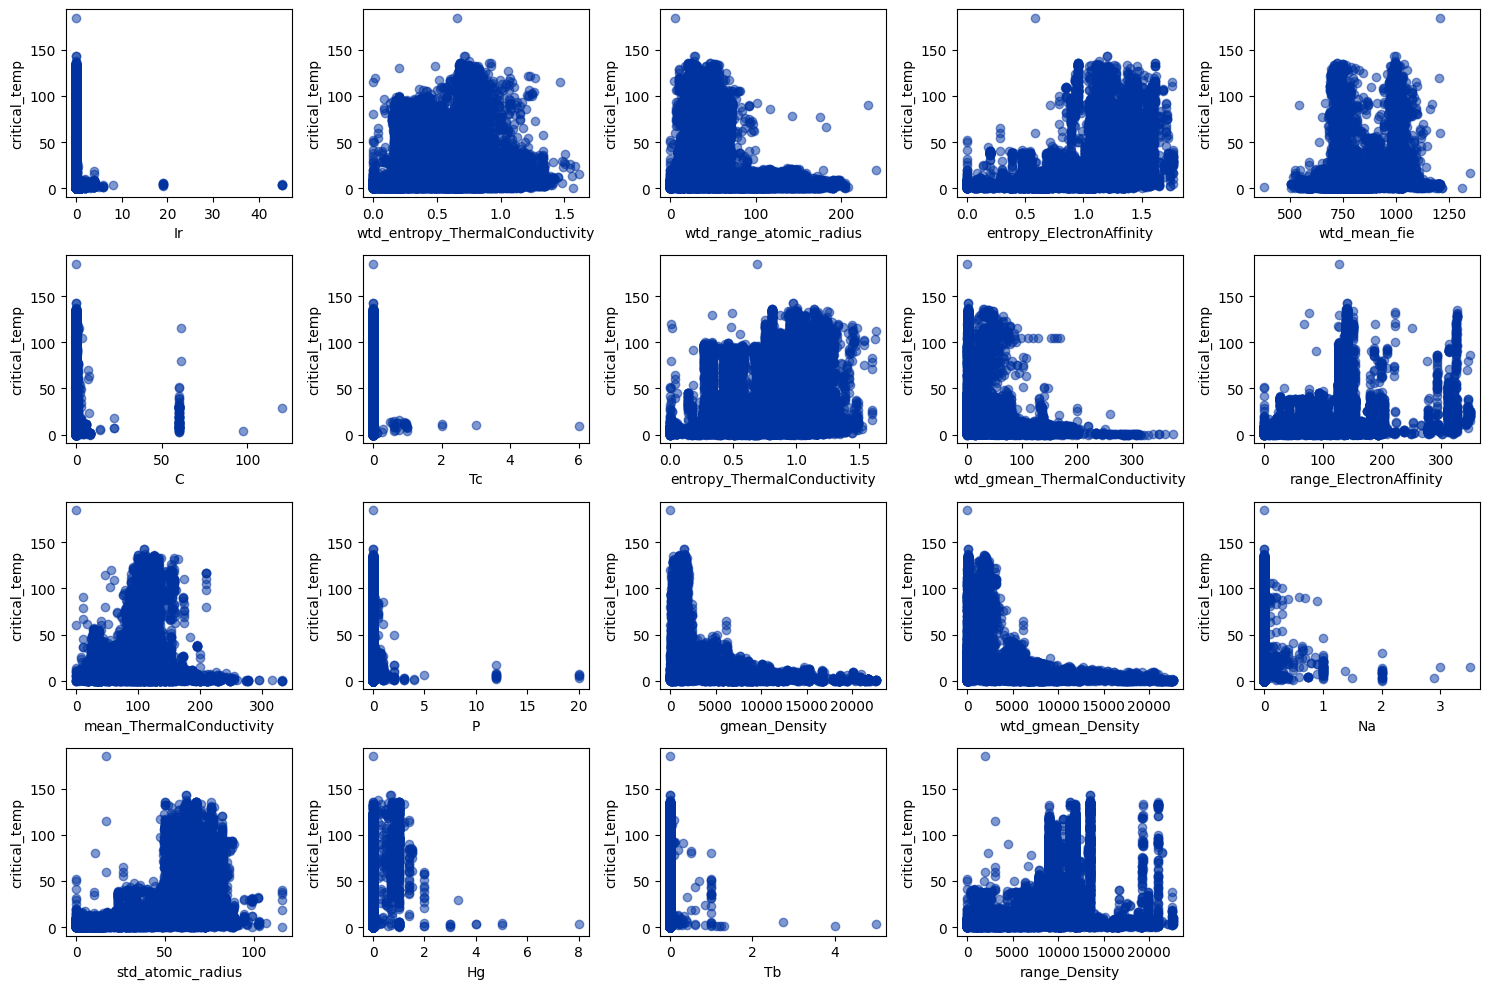

In [33]:
plt.figure(figsize = (15, 10))
num_cols = len(random_features)

for idx, col in enumerate(random_features):
    plt.subplot(4, 5, idx + 1)
    plt.scatter(x_train[col], y_train, alpha = 0.5, color = '#0033A0')
    plt.xlabel(col)
    plt.ylabel('critical_temp')

plt.tight_layout()
plt.show()


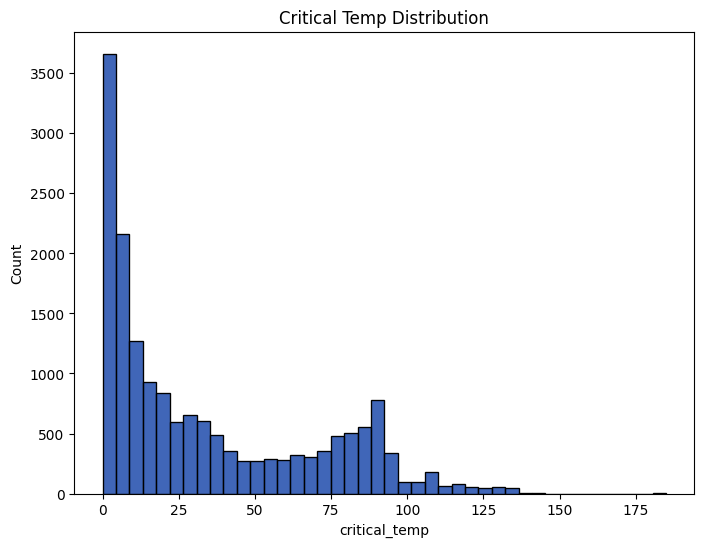

In [60]:
plt.figure(figsize = (8, 6))
sns.histplot(y_train, color = '#0033A0')
plt.title('Critical Temp Distribution')
plt.show()

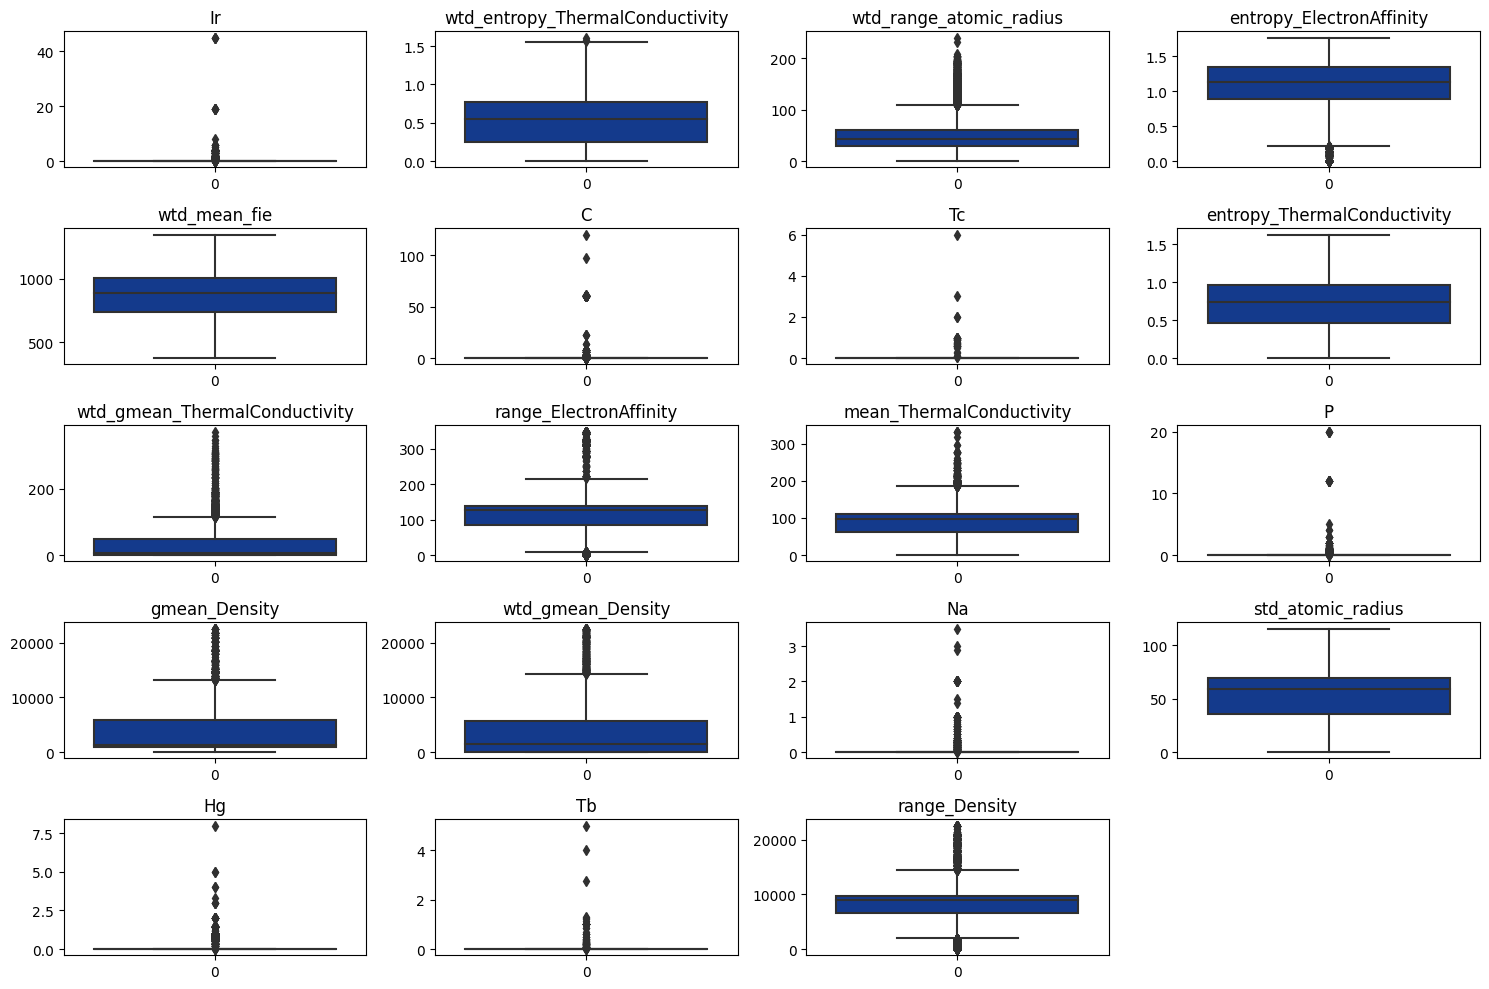

In [52]:
plt.figure(figsize = (15, 10))
num_cols = len(random_features)

for idx, col in enumerate(random_features):
    plt.subplot(5, 4, idx + 1)
    sns.boxplot(x_train[col], color = '#0033A0')
    plt.title(col)

plt.tight_layout()
plt.show()


In [58]:
# based on https://careerfoundry.com/en/blog/data-analytics/how-to-find-outliers/

print('\nOutliers for the randomly selected features:')

for col in random_features:
    q1 = x_train[col].quantile(0.25)
    q3 = x_train[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    outliers = y_train[(x_train[col] < lower_bound) | (x_train[col] > upper_bound)]
    num_outliers = len(outliers)
    print(f"\nOutliers in {col} ({num_outliers} outliers): \n{outliers.tolist()}")



Outliers for the randomly selected features:

Outliers in Ir (457 outliers): 
[3.1, 2.4, 3.07, 8.5, 0.168, 0.429, 3.5, 2.09, 0.067, 4.4, 0.46, 0.75, 8.46, 0.78, 3.0, 0.64, 0.095, 2.39, 0.107, 7.74, 4.5, 0.07, 2.775, 0.73, 7.5, 8.35, 2.16, 0.94, 3.45, 3.315, 38.0, 0.037, 0.5, 2.25, 16.0, 7.0, 0.67, 0.11, 0.77, 8.77, 0.162, 0.5, 2.5, 5.77, 2.53, 3.74, 0.08, 1.03, 0.35, 5.72, 4.59, 2.3, 8.3, 1.76, 2.6, 6.8, 7.49, 9.24, 5.5, 0.83, 2.19, 4.88, 3.72, 4.3, 3.66, 1.1, 3.2, 2.13, 0.12, 0.58, 1.043, 2.7, 0.13, 6.6, 3.2, 6.13, 0.116, 3.05, 2.13, 0.095, 0.87, 0.22, 2.72, 2.61, 1.48, 0.05, 0.35, 7.68, 6.32, 2.24, 0.16, 3.39, 3.01, 16.0, 24.2, 0.64, 0.11, 2.6, 1.99, 0.127, 8.0, 2.1, 4.53, 3.6, 2.32, 0.115, 18.3, 1.83, 2.1, 4.6, 1.1, 4.46, 6.5, 3.2, 0.84, 6.41, 3.0, 7.37, 1.4, 0.035, 7.95, 0.095, 0.21, 0.65, 0.15, 3.5, 5.8, 1.5, 3.04, 17.6, 0.055, 3.34, 11.85, 2.38, 1.2, 2.43, 0.172, 1.64, 0.115, 8.174, 3.3, 1.26, 6.03, 0.9, 0.97, 3.01, 2.2, 1.98, 2.15, 17.3, 1.75, 2.6, 5.55, 3.88, 4.33, 4.7, 0.61, 

below takes about 7 min

In [9]:
# Lasso Regression
lasso = Lasso()
n_splits = 10
splitter = KFold(n_splits = n_splits, shuffle = True)
params = {'alpha': np.logspace(-6, 6, 20)}
search = GridSearchCV(lasso,
                      params,
                      cv = splitter,
                      n_jobs = -1,
                      scoring = 'neg_mean_squared_error')

search.fit(x_train_scaled, y_train)

best_lasso = search.best_estimator_
lasso_mse = -search.best_score_
best_lasso_params = search.best_params_

print('Lasso Best MSE:', lasso_mse)
print('Lasso Best Parameters:', best_lasso_params)
print('---------------------------------------')

# Ridge Regression
ridge = Ridge()
params = {'alpha': np.logspace(-6, 6, 20)}
search = GridSearchCV(ridge,
                      params,
                      cv = splitter,
                      n_jobs = -1,
                      scoring = 'neg_mean_squared_error')

search.fit(x_train_scaled, y_train)

best_ridge = search.best_estimator_
ridge_mse = -search.best_score_
best_ridge_params = search.best_params_

print('Ridge Best MSE:', ridge_mse)
print('Ridge Best Parameters:', best_ridge_params)


Lasso Best MSE: 339.95248391525877
Lasso Best Parameters: {'alpha': 0.4832930238571752}
---------------------------------------
Ridge Best MSE: 325.58998872384734
Ridge Best Parameters: {'alpha': 695.1927961775591}


In [10]:
# Lasso Regression
lasso = Lasso()
n_splits = 10
splitter = KFold(n_splits = n_splits, shuffle = True)
params = {'alpha': np.logspace(-6, 6, 20)}
search = GridSearchCV(lasso,
                      params,
                      cv = splitter,
                      n_jobs = -1,
                      scoring = 'neg_mean_squared_error')

search.fit(x_train_scaled, y_train)

best_lasso = search.best_estimator_
best_lasso_params = search.best_params_

print('Lasso Best Parameters:', best_lasso_params)

lasso_cv_scores = cross_val_score(best_lasso,
                                  x_train_scaled,
                                  y_train,
                                  cv = splitter,
                                  scoring = 'neg_mean_squared_error')

lasso_cv_mse = -np.mean(lasso_cv_scores)

lasso_cv_preds = cross_val_predict(best_lasso,
                                   x_train_scaled,
                                   y_train,
                                   cv = splitter)

print('Lasso Cross-Validated MSE:', lasso_cv_mse)
print('-------------------------------------------')

# Ridge Regression
ridge = Ridge()
params = {'alpha': np.logspace(-6, 6, 20)}
search = GridSearchCV(ridge,
                      params,
                      cv = splitter,
                      n_jobs = -1,
                      scoring = 'neg_mean_squared_error')

search.fit(x_train_scaled, y_train)

best_ridge = search.best_estimator_
best_ridge_params = search.best_params_

print('Ridge Best Parameters:', best_ridge_params)

ridge_cv_scores = cross_val_score(best_ridge,
                                  x_train_scaled,
                                  y_train,
                                  cv = splitter,
                                  scoring = 'neg_mean_squared_error')

ridge_cv_mse = -np.mean(ridge_cv_scores)

ridge_cv_preds = cross_val_predict(best_ridge,
                                   x_train_scaled,
                                   y_train,
                                   cv = splitter)

print('Ridge Cross-Validated MSE:', ridge_cv_mse)


Lasso Best Parameters: {'alpha': 0.4832930238571752}
Lasso Cross-Validated MSE: 339.2825286805343
-------------------------------------------
Ridge Best Parameters: {'alpha': 695.1927961775591}
Ridge Cross-Validated MSE: 325.1365971114907


compare preds to actuals

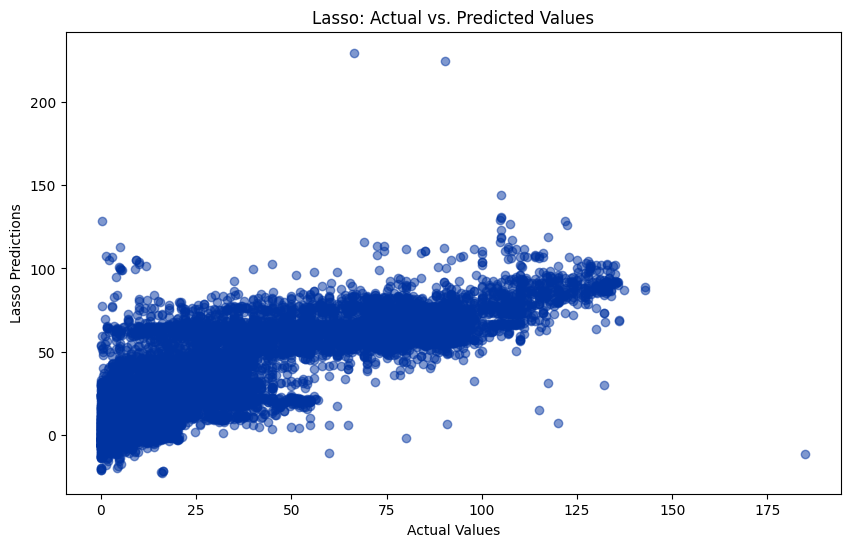

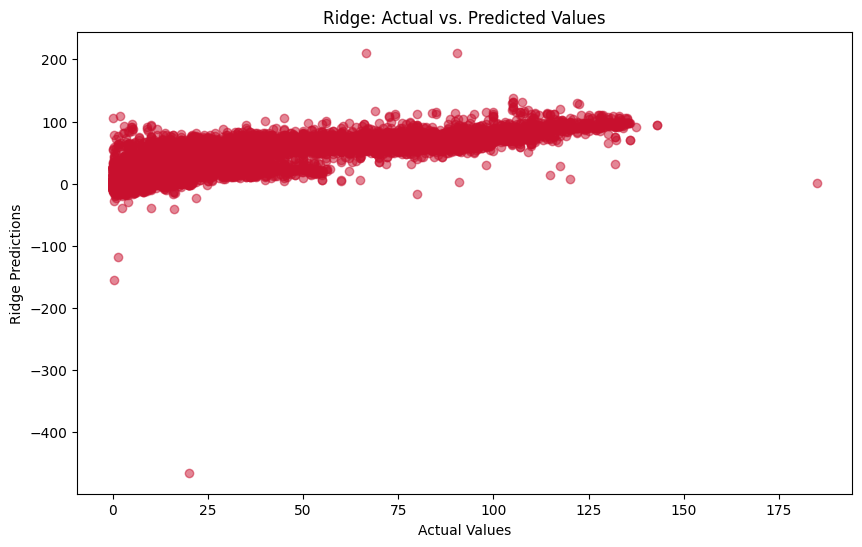

In [ ]:
lasso_cv_preds = cross_val_predict(best_lasso,
                                   x_train_scaled,
                                   y_train,
                                   cv = splitter)

ridge_cv_preds = cross_val_predict(best_ridge,
                                   x_train_scaled,
                                   y_train,
                                   cv = splitter)

# Scatter plot for lasso
plt.figure(figsize = (10, 6))
plt.scatter(y_train, lasso_cv_preds, color = '#0033A0', alpha = 0.5)
plt.xlabel('Actual Values')
plt.ylabel('Lasso Predictions')
plt.title('Lasso: Actual vs. Predicted Values')
plt.show()

# Scatter plot for ridge
plt.figure(figsize = (10, 6))
plt.scatter(y_train, ridge_cv_preds, color = '#C8102E', alpha = 0.5)
plt.xlabel('Actual Values')
plt.ylabel('Ridge Predictions')
plt.title('Ridge: Actual vs. Predicted Values')
plt.show()


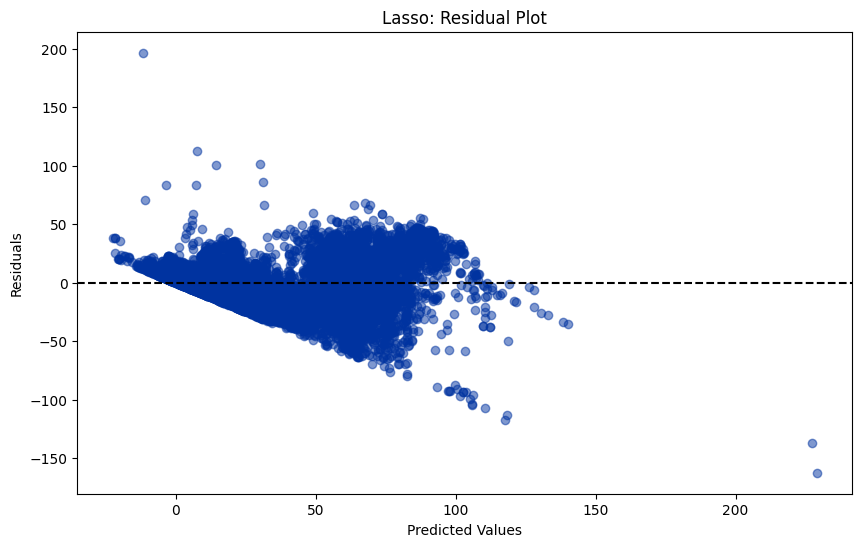

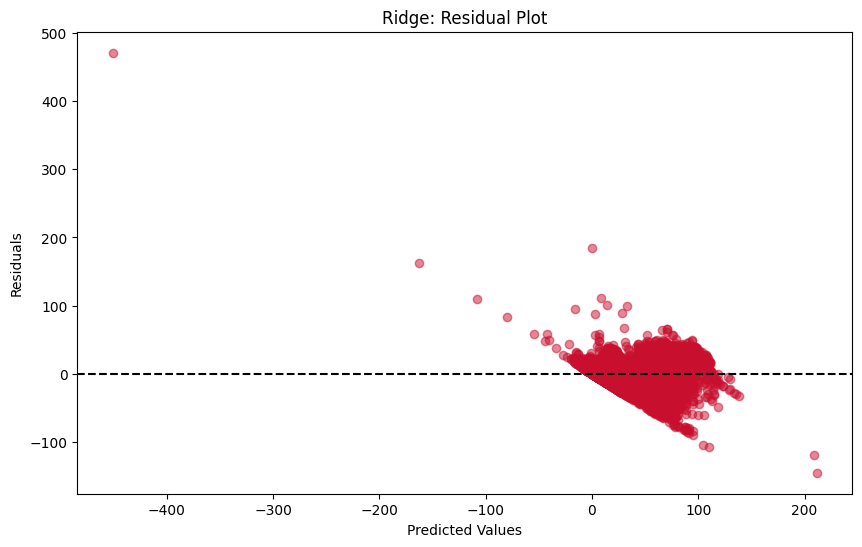

In [ ]:
# Residual plot for lasso
plt.figure(figsize = (10, 6))
plt.scatter(lasso_cv_preds,
            y_train - lasso_cv_preds,
            color = '#0033A0',
            alpha = 0.5)
plt.axhline(y = 0, color = 'black', linestyle = '--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Lasso: Residual Plot')
plt.show()

# Residual plot for ridge
plt.figure(figsize = (10, 6))
plt.scatter(ridge_cv_preds,
            y_train - ridge_cv_preds,
            color = '#C8102E',
            alpha = 0.5)
plt.axhline(y = 0, color = 'black', linestyle = '--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Ridge: Residual Plot')
plt.show()


feature importance plot

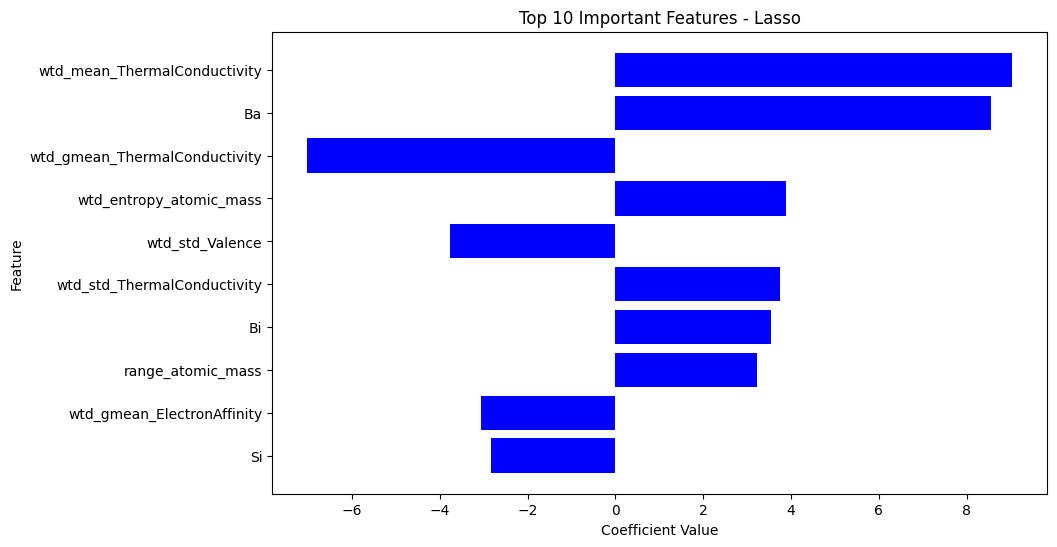

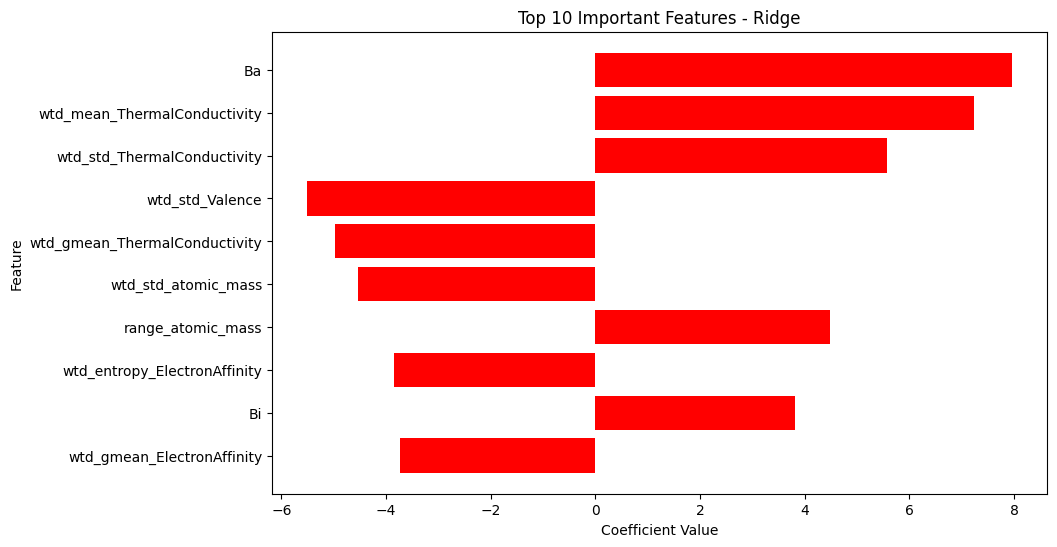

In [ ]:
lasso_coefs = best_lasso.coef_
ridge_coefs = best_ridge.coef_


feature_names = x.columns.tolist()

lasso_coef_df = pd.DataFrame({'Feature': feature_names,
                              'Coefficient': lasso_coefs})

ridge_coef_df = pd.DataFrame({'Feature': feature_names,
                              'Coefficient': ridge_coefs})

lasso_coef_df = lasso_coef_df.reindex(lasso_coef_df['Coefficient'].abs().sort_values(ascending = False).index)
ridge_coef_df = ridge_coef_df.reindex(ridge_coef_df['Coefficient'].abs().sort_values(ascending = False).index)

# Plot most important features for Lasso
plt.figure(figsize = (10, 6))
plt.barh(lasso_coef_df['Feature'][:10],
         lasso_coef_df['Coefficient'][:10],
         color = 'blue')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Top 10 Important Features - Lasso')
plt.gca().invert_yaxis()
plt.show()

# Plot  most important features for Ridge
plt.figure(figsize = (10, 6))
plt.barh(ridge_coef_df['Feature'][:10],
         ridge_coef_df['Coefficient'][:10],
         color = 'red')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Top 10 Important Features - Ridge')
plt.gca().invert_yaxis()
plt.show()


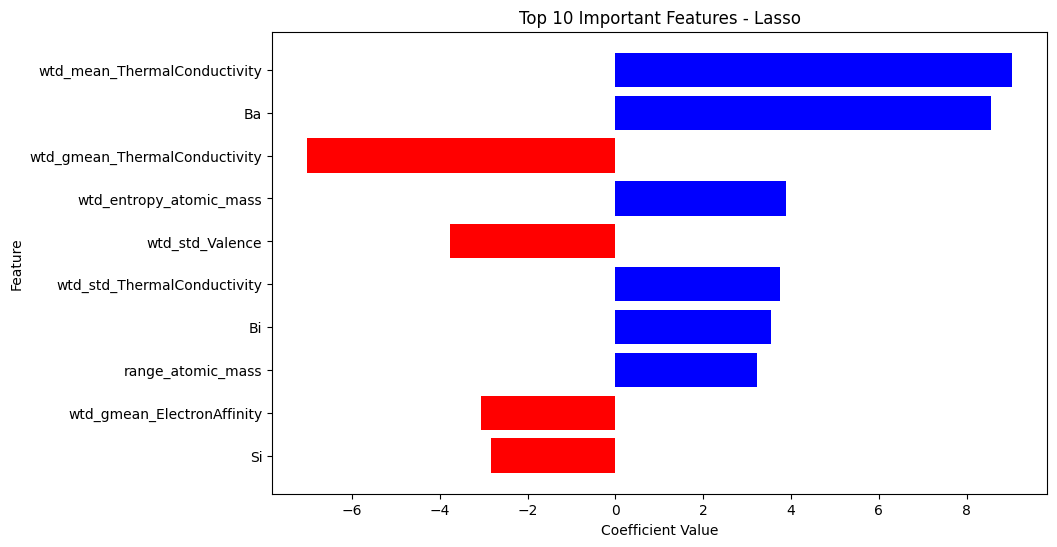

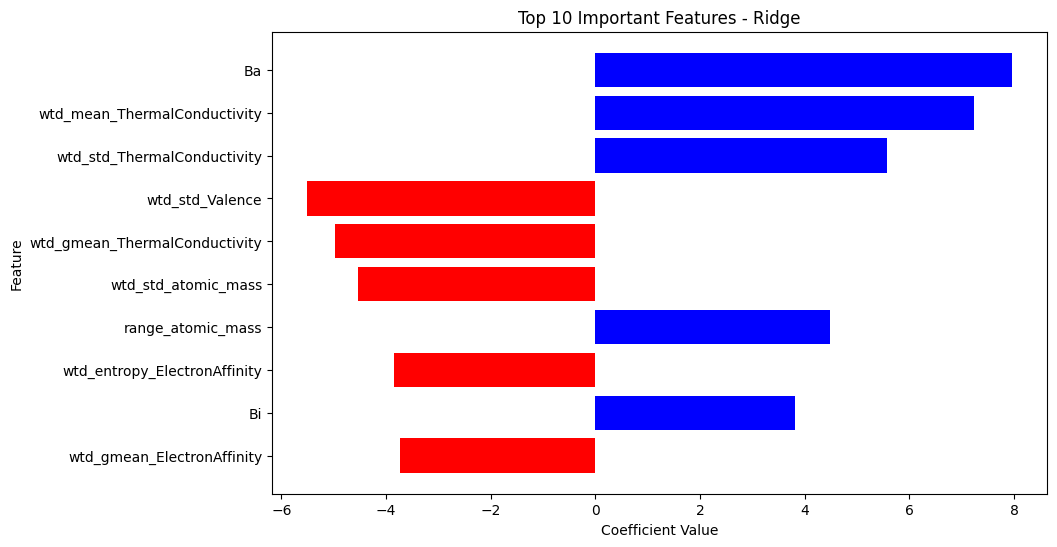

In [ ]:
# Plot the most important features for lasso
plt.figure(figsize = (10, 6))
colors = ['red' if c < 0 else 'blue' for c in lasso_coef_df['Coefficient'][:10]]
plt.barh(lasso_coef_df['Feature'][:10],
         lasso_coef_df['Coefficient'][:10],
         color = colors)
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Top 10 Important Features - Lasso')
plt.gca().invert_yaxis()
plt.show()

# Plot the most important features for Ridge
plt.figure(figsize = (10, 6))
colors = ['red' if c < 0 else 'blue' for c in ridge_coef_df['Coefficient'][:10]]
plt.barh(ridge_coef_df['Feature'][:10],
         ridge_coef_df['Coefficient'][:10],
         color = colors)
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Top 10 Important Features - Ridge')
plt.gca().invert_yaxis()
plt.show()